# Smoothing Splines Notebook
- LinearGAM with s(x) for each numeric predictor and .gridsearch for smoothing


In [3]:
# pip install pygam

In [23]:
import os, sys, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pygam import LinearGAM, s
from sklearn.metrics import mean_squared_error

In [29]:
# local utils
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from utils_plots import plot_pred_vs_actual, plot_residuals, report_mse

# load train/test data
DATA_DIR = os.path.join(os.path.dirname(os.getcwd()), 'data')
train_path = os.path.join(DATA_DIR, 'concrete_train.csv')
test_path  = os.path.join(DATA_DIR, 'concrete_test.csv')

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

# split X/y
X_train = train_df.drop(columns=['concrete_compressive_strength']).to_numpy(dtype=float)
y_train = train_df['concrete_compressive_strength'].values
X_test  = test_df.drop(columns=['concrete_compressive_strength']).to_numpy(dtype=float)
y_test  = test_df['concrete_compressive_strength'].values

In [31]:
n_features = X_train.shape[1]
terms = s(0)
for i in range(1, n_features):
    terms += s(i)

gam = LinearGAM(terms).gridsearch(X_train, y_train)

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:010:00


In [41]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     75.8342
Link Function:                     IdentityLink Log Likelihood:                                 -2993.6805
Number of Samples:                          721 AIC:                                             6141.0295
                                                AICc:                                             6159.626
                                                GCV:                                               30.6512
                                                Scale:                                             24.9088
                                                Pseudo R-Squared:                                   0.9192
Feature Function                  Lam

/var/folders/sh/_bhyzm793_xf52d7_xjh0s5m0000gn/T/ipykernel_31734/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [35]:
y_pred_test = gam.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", test_mse)

Test MSE: 32.307728506798604


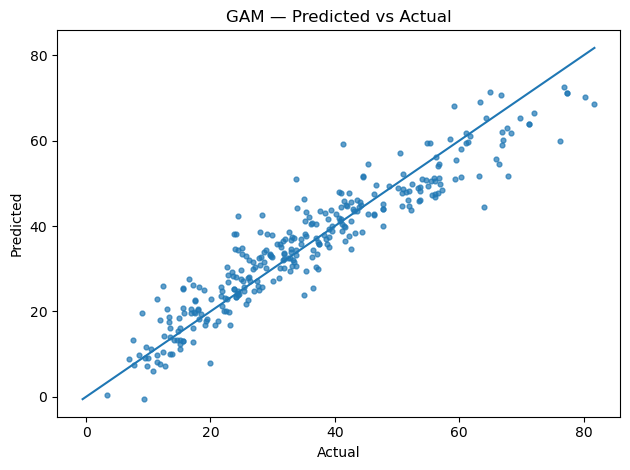

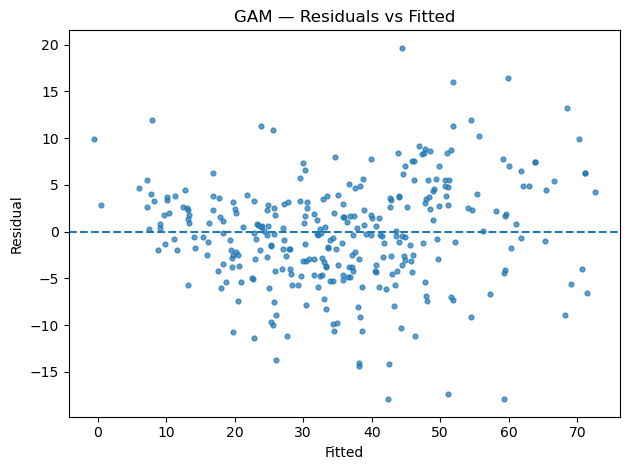

In [37]:
fig_dir = os.path.join(os.path.dirname(os.getcwd()), 'reports', 'figures')
os.makedirs(fig_dir, exist_ok=True)
plot_pred_vs_actual(y_test, y_pred_test, title='GAM — Predicted vs Actual', save_path=os.path.join(fig_dir, 'gam_pv.png'))
plot_residuals(y_test, y_pred_test, title='GAM — Residuals vs Fitted', save_path=os.path.join(fig_dir, 'gam_resid.png'))

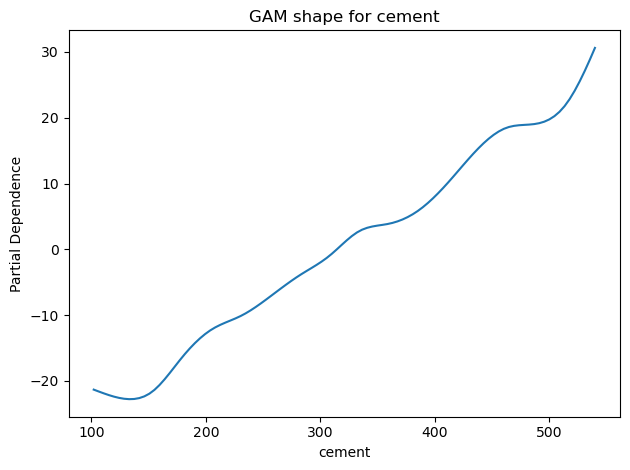

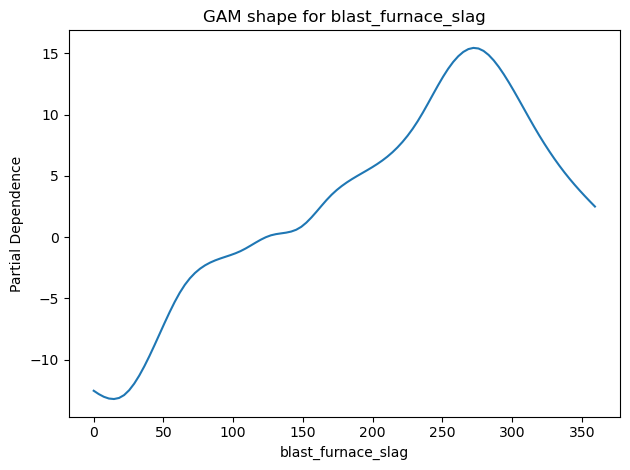

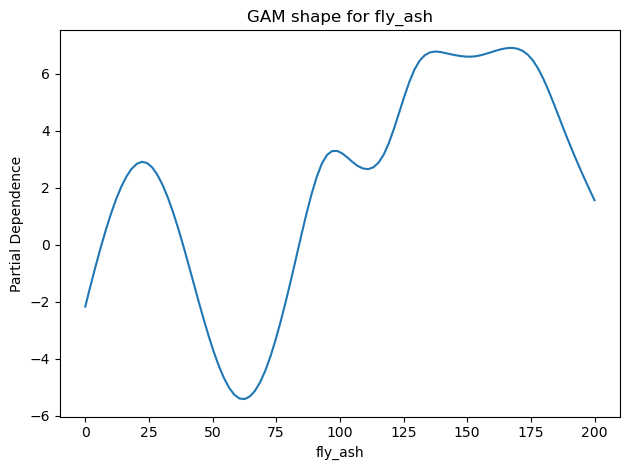

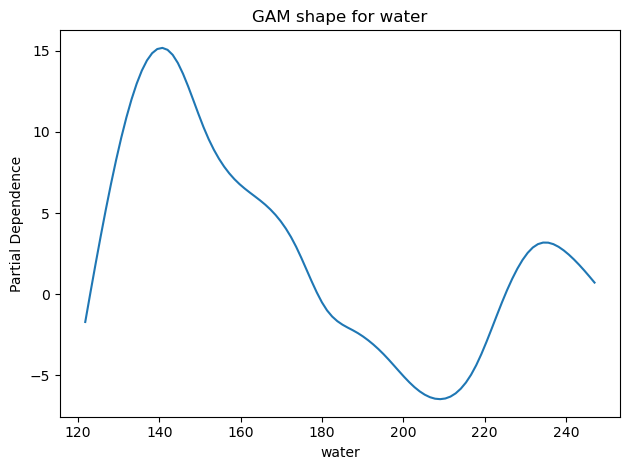

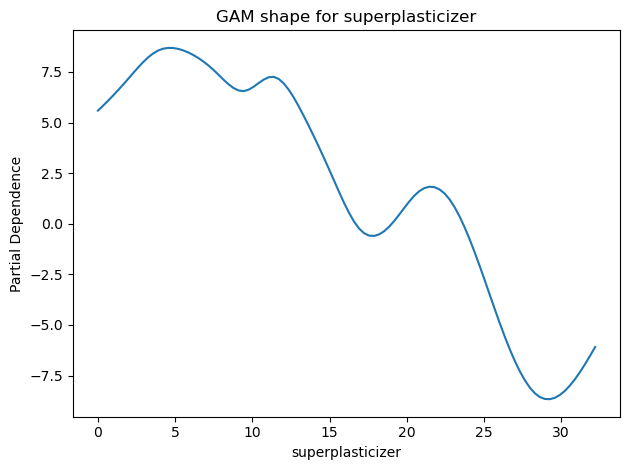

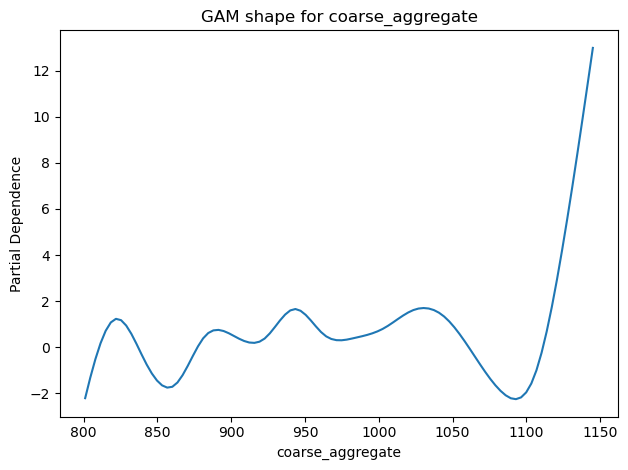

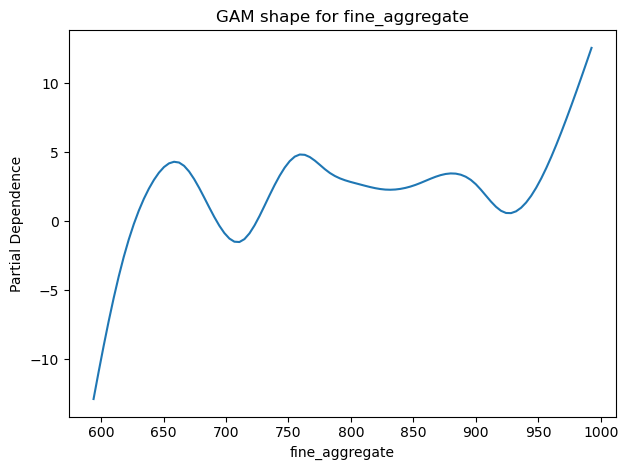

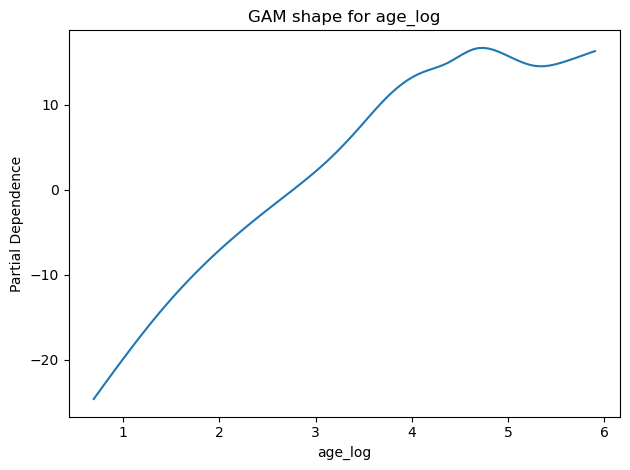

In [53]:
feature_names = train_df.drop(columns=['concrete_compressive_strength']).columns

for i, feature in enumerate(feature_names):
    plt.figure()
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.title(f'GAM shape for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Partial Dependence')
    plt.tight_layout()
    plt.show()

In [43]:
# Save Model Output
pd.DataFrame({"Model": ["Smoothing Splines"], "Test MSE": [test_mse]}).to_csv(os.path.join(fig_dir, 'smoothing_splines.csv'), index=False)